In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv('diabetes kaggle.csv')

## Exploring the dataset

In [4]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [5]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
# Returns the first x number of rows when tail(num). Without a number it returns 5
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [7]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


0    1316
1     684
Name: Outcome, dtype: int64


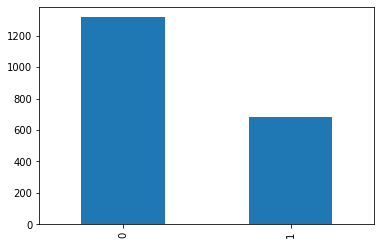

In [13]:
# Plotting the Outcomes based on the number of dataset entries
print(df.Outcome.value_counts())
p = df.Outcome.value_counts().plot(kind='bar')

## Data Cleaning

In [14]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

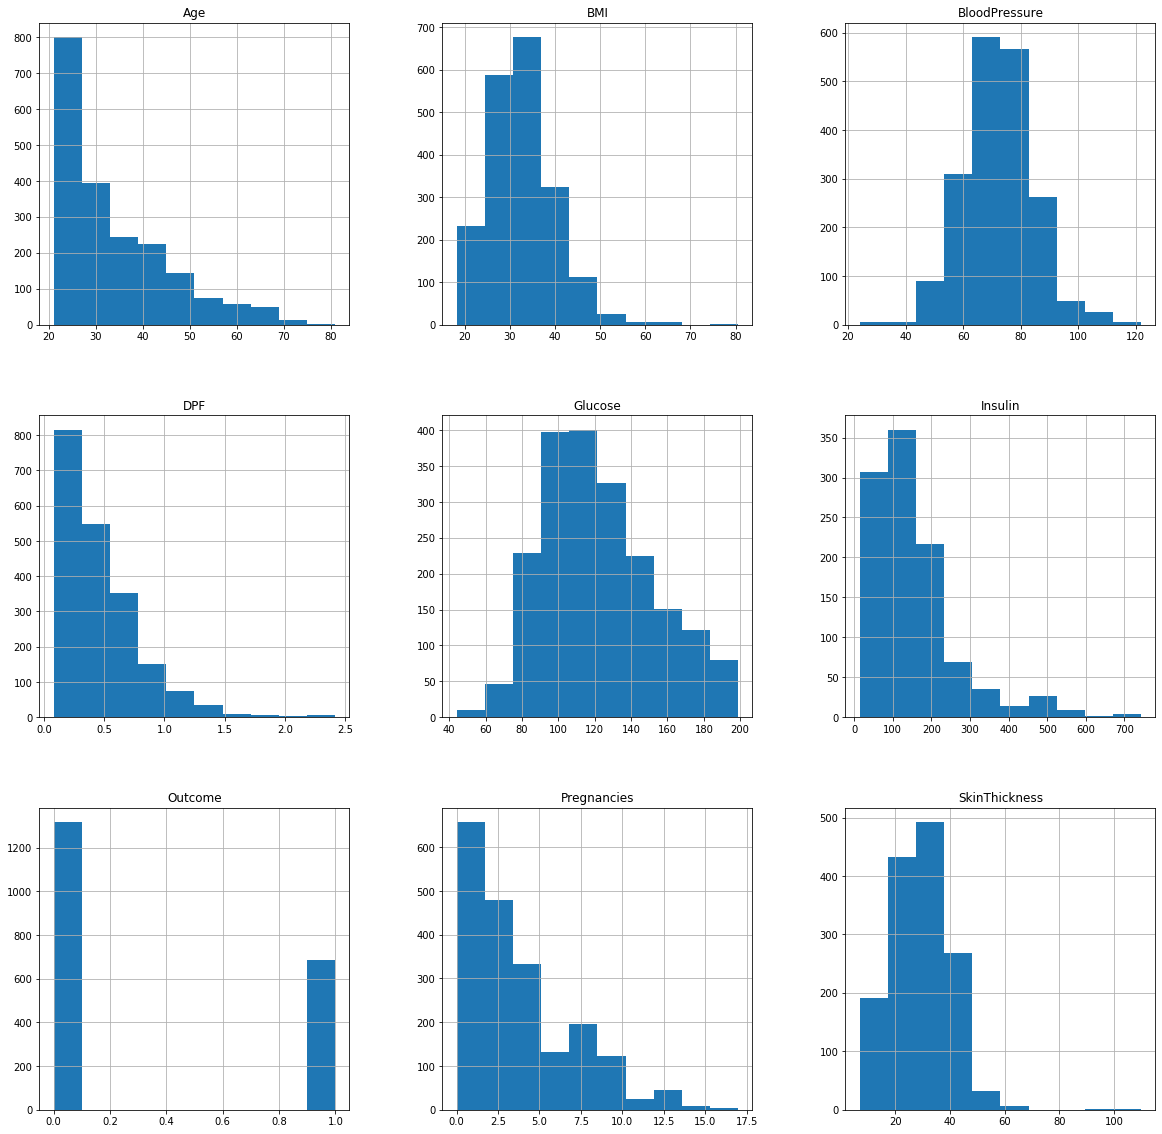

In [15]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (20,20))

In [16]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

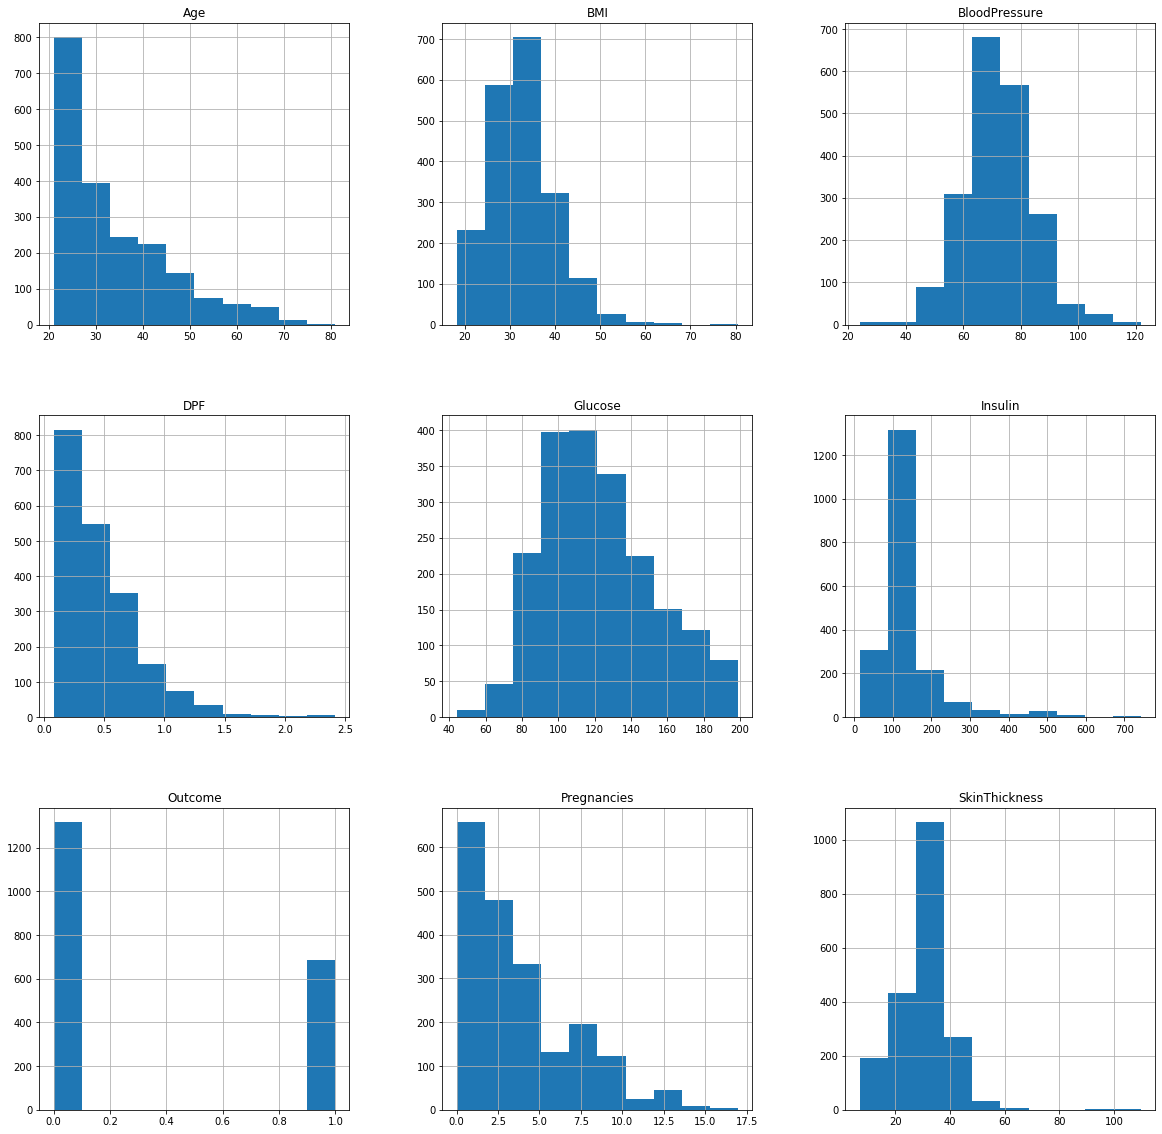

In [17]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(20,20))

In [18]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

## Feature Scaling and Model Building

In [19]:
# Scaling the entire dataset using StandardScalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_copy.drop('Outcome', axis='columns')))
X.head()

,0,1,2,3,4,5,6,7
0,-0.515394,0.524960,-0.870852,0.631010,-0.177601,0.132630,-1.063246,1.180424
1,-1.120495,-1.244054,0.803273,0.192542,-0.189864,0.772550,-0.735551,-0.856326
2,-1.120495,0.754277,0.000000,-0.026692,-0.177601,1.607229,0.491759,-0.177409
3,-1.120495,0.426682,-0.368614,1.398329,1.343080,1.342914,-0.327478,-0.771462
4,-0.817945,0.557720,-0.870852,1.288712,4.163696,1.120333,0.201161,-1.026055


In [20]:
# Splitting the model in features and label
X = X
y = df_copy.Outcome

In [21]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X, y)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.7805
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.9220
2,random_forest,{'n_estimators': 20},0.9825
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.8925


#### Since the Random Forest algorithm has the highest accuracy, the model selected for this problem is Random Forest.

In [23]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=15), X, y, cv=5)
print('Highest Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Highest Accuracy : 99.0%


In [24]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


In [25]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split

X_clf = df_copy.drop('Outcome', axis='columns')
y_clf = df_copy.Outcome

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.20, random_state=20)
print(len(X_train),len(X_test))

1600 400


In [26]:
# Creating Random Forest Model
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9775

In [27]:
# Creating a function for prediction
def prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    x = [preg, glucose, bp, st, insulin, bmi, dpf, age]
    return clf.predict([x])[0]

In [28]:
# Prediction 1
# Input in the form : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction(2, 81, 72, 15, 76, 30.1, 0.547, 25)

0

In [29]:
# Prediction 1
# Input in the form : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction(5, 120, 92, 10, 81, 26.1, 0.551, 67)

0

In [30]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Predicted Values')

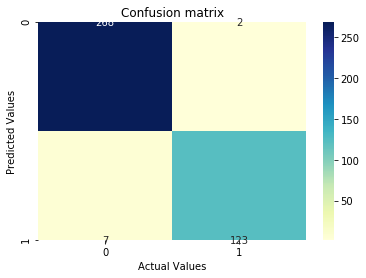

In [31]:
# Plotting the confusion matrix
import seaborn as sns
p = sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')